In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
import plotly.graph_objs as go
import numpy as np

In [49]:
import sys
print("Phiên bản Python hiện tại:", sys.version)

Phiên bản Python hiện tại: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [21]:
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")
df = df[["Ngày", "12"]]
df = df.sort_index()
df

,Ngày,12
0,01/01/2021,964.4
1,01/02/2021,1019.7
2,01/03/2021,988.4
3,01/04/2021,1010.8
4,01/05/2021,1061.5
...,...,...
360,27/12/2021,1002.0
361,28/12/2021,1002.0
362,29/12/2021,1061.5
363,30/12/2021,1022.6


# HMM

In [22]:
# Chuyển đổi cột 'Ngày' sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Đặt cột 'Ngày' làm chỉ số của dataframe
df.set_index('Ngày', inplace=True)

# Kiểm tra dữ liệu
print(df.head())

                12
Ngày              
2021-01-01   964.4
2021-02-01  1019.7
2021-03-01   988.4
2021-04-01  1010.8
2021-05-01  1061.5


In [23]:
import numpy as np
from hmmlearn import hmm

# Chuẩn bị dữ liệu cho HMM
data = df[['12']].values

# Xây dựng mô hình HMM với GaussianHMM
model = hmm.GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000)
model.fit(data)

# Kiểm tra các tham số của mô hình
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print(f"State {i}:")
    print("Mean =", model.means_[i])
    print("Var =", np.diag(model.covars_[i]))

Means and vars of each hidden state
State 0:
Mean = [1065.29350983]
Var = [14.24254125]
State 1:
Mean = [1388.96333695]
Var = [9608.72046625]
State 2:
Mean = [987.68357667]
Var = [894.71479856]


                12  Hidden State
Ngày                            
2021-01-01   964.4             2
2021-02-01  1019.7             2
2021-03-01   988.4             2
2021-04-01  1010.8             2
2021-05-01  1061.5             0


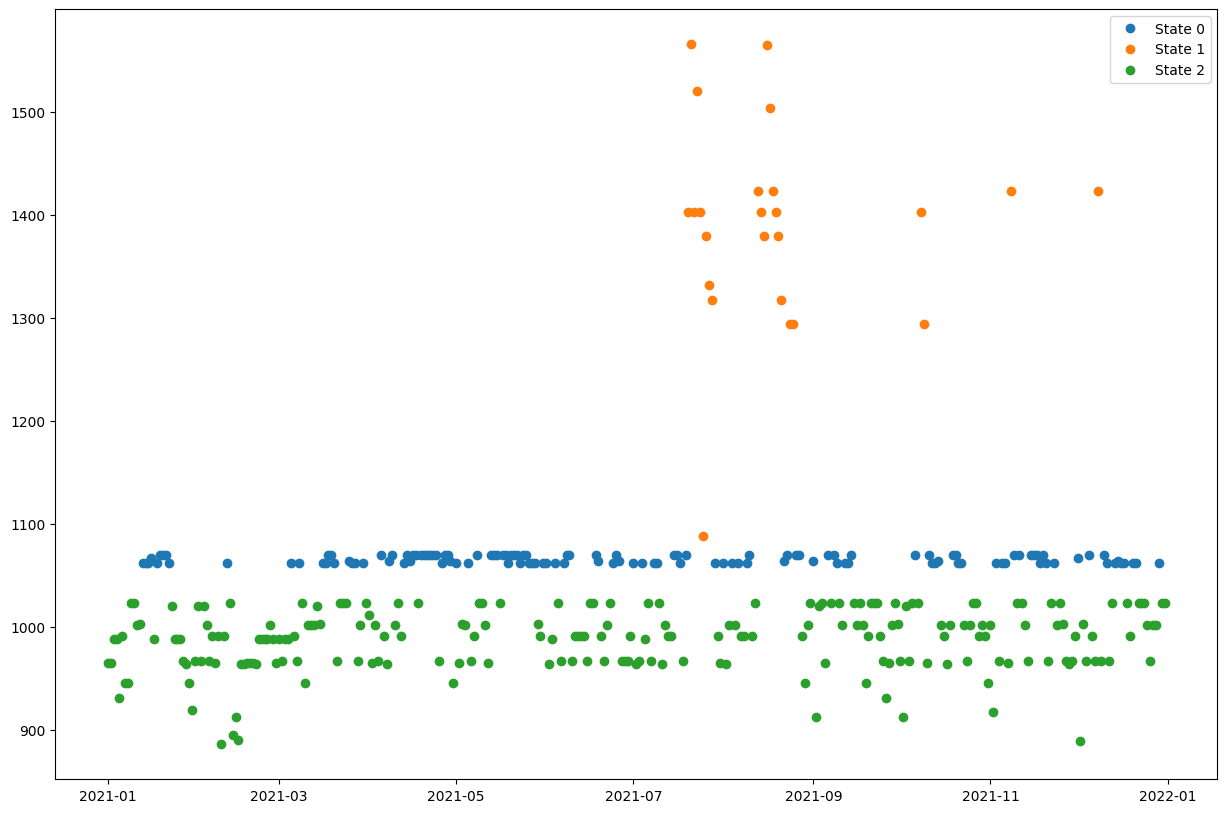

In [24]:
# Dự đoán các trạng thái ẩn cho dữ liệu
hidden_states = model.predict(data)

# Thêm các trạng thái ẩn vào dataframe
df['Hidden State'] = hidden_states

# Hiển thị kết quả
print(df.head())

# Vẽ biểu đồ để xem phân bố các trạng thái ẩn
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(df.index[state], df['12'][state], 'o', label=f'State {i}')

plt.legend()
plt.show()


In [26]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from datetime import datetime

# Đọc dữ liệu
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")
df = df[["Ngày", "12"]]

# Chuyển đổi cột "Ngày" thành định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp dữ liệu theo ngày
df = df.sort_values('Ngày')

# Đặt lại chỉ số
df = df.reset_index(drop=True)

# Trích xuất giá trị ngày và giá
dates = np.array(df['Ngày'])
prices = np.array(df['12']).reshape(-1, 1)


In [27]:
# Số lượng trạng thái ẩn (hidden states)
num_states = 3

# Khởi tạo mô hình HMM
model = GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(prices)

# Lấy các trạng thái ẩn dự đoán
hidden_states = model.predict(prices)


         Ngày  Dự đoán giá
0  2022-01-01   927.745699
1  2022-01-02  1004.458472
2  2022-01-03  1029.599790
3  2022-01-04  1036.325207
4  2022-01-05   977.377342
5  2022-01-06   966.680180
6  2022-01-07  1030.658822
7  2022-01-08  1016.345072
8  2022-01-09   996.604455
9  2022-01-10   979.869137
10 2022-01-11   944.594963
11 2022-01-12  1021.994332
12 2022-01-13   999.717763
13 2022-01-14   966.993768
14 2022-01-15   968.803629
15 2022-01-16   968.479512
16 2022-01-17   970.288703
17 2022-01-18   934.153739
18 2022-01-19   920.421762
19 2022-01-20   967.617050
20 2022-01-21   999.134237
21 2022-01-22   993.874746
22 2022-01-23   959.177769
23 2022-01-24   983.236834
24 2022-01-25  1020.227203
25 2022-01-26   951.818096
26 2022-01-27   985.115036
27 2022-01-28   942.553925
28 2022-01-29   987.850711
29 2022-01-30   923.685795


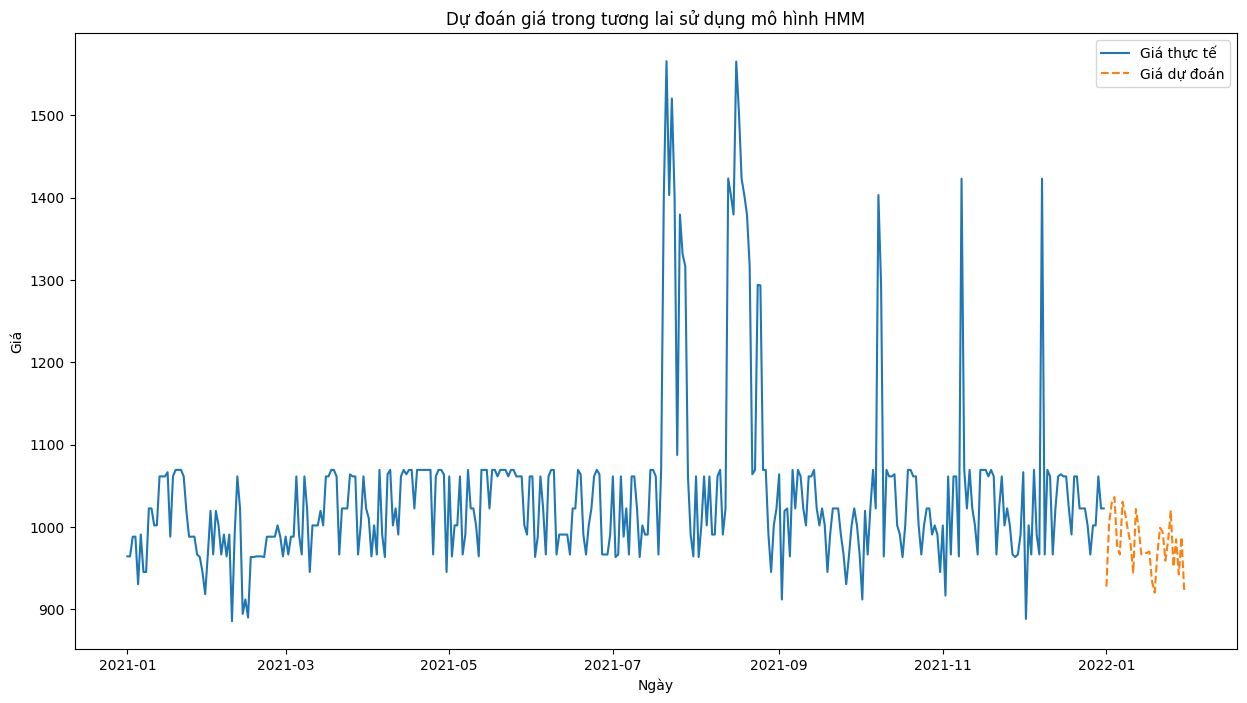

In [30]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from datetime import datetime

# Đọc dữ liệu
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")
df = df[["Ngày", "12"]]

# Chuyển đổi cột "Ngày" thành định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp dữ liệu theo ngày
df = df.sort_values('Ngày')

# Đặt lại chỉ số
df = df.reset_index(drop=True)

# Trích xuất giá trị ngày và giá
dates = np.array(df['Ngày'])
prices = np.array(df['12']).reshape(-1, 1)

# Số lượng trạng thái ẩn (hidden states)
num_states = 3

# Khởi tạo mô hình HMM
model = GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(prices)

# Lấy các trạng thái ẩn dự đoán
hidden_states = model.predict(prices)

# Sử dụng mô hình đã huấn luyện để dự đoán giá trị trong tương lai
num_days = 30  # Số ngày cần dự đoán
future_prices = []

# Sử dụng giá trị cuối cùng để bắt đầu dự đoán
current_price = prices[-1]

for _ in range(num_days):
    # Lấy trạng thái hiện tại
    current_state = model.predict(current_price.reshape(-1, 1))
    # Tính giá trị dự đoán tiếp theo
    next_price = model.means_[current_state] + np.random.normal(0, np.sqrt(model.covars_[current_state])).reshape(-1, 1)
    future_prices.append(next_price[0][0])
    current_price = next_price

# Chuyển đổi kết quả thành DataFrame
future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=num_days)
future_df = pd.DataFrame({'Ngày': future_dates, 'Dự đoán giá': future_prices})

# Hiển thị DataFrame dự đoán
print(future_df)

# Vẽ biểu đồ giá thực tế và dự đoán
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(df['Ngày'], df['12'], label='Giá thực tế')
plt.plot(future_df['Ngày'], future_df['Dự đoán giá'], label='Giá dự đoán', linestyle='--')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.title('Dự đoán giá trong tương lai sử dụng mô hình HMM')
plt.show()


# EDA

## Thống Kê Tóm Tắt

In [10]:
summary_stats = df.describe()
summary_stats

,12,19,21
count,365.000000,365.000000,365.000000
mean,1040.311507,1040.288767,1038.708493
std,105.147065,105.144141,105.630990
min,885.700000,881.500000,782.800000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.600000,1061.500000
max,1565.500000,1565.500000,1565.500000


## Kiểm tra các giá trị thiếu

In [11]:
missing_data = df.isnull().sum()
print(missing_data)

Ngày    0
12      0
19      0
21      0
dtype: int64


## Phân phối của các biến

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


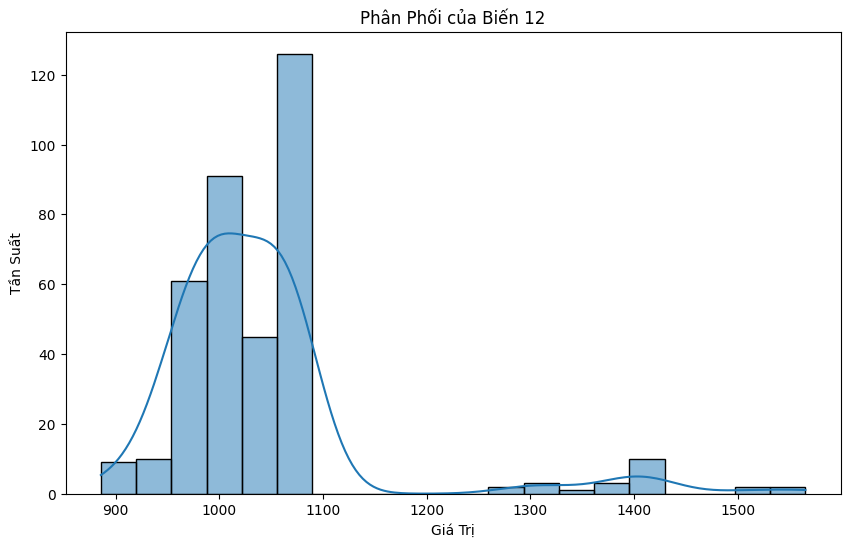

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi cột 'Ngày' sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Phân phối của biến '12'
plt.figure(figsize=(10, 6))
sns.histplot(df['12'], bins=20, kde=True)
plt.title('Phân Phối của Biến 12')
plt.xlabel('Giá Trị')
plt.ylabel('Tần Suất')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


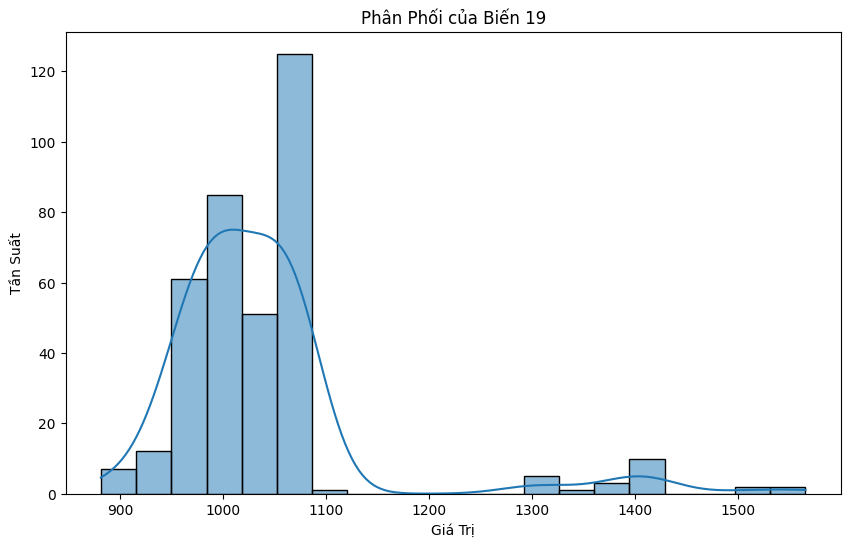

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi cột 'Ngày' sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Phân phối của biến '19'
plt.figure(figsize=(10, 6))
sns.histplot(df['19'], bins=20, kde=True)
plt.title('Phân Phối của Biến 19')
plt.xlabel('Giá Trị')
plt.ylabel('Tần Suất')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


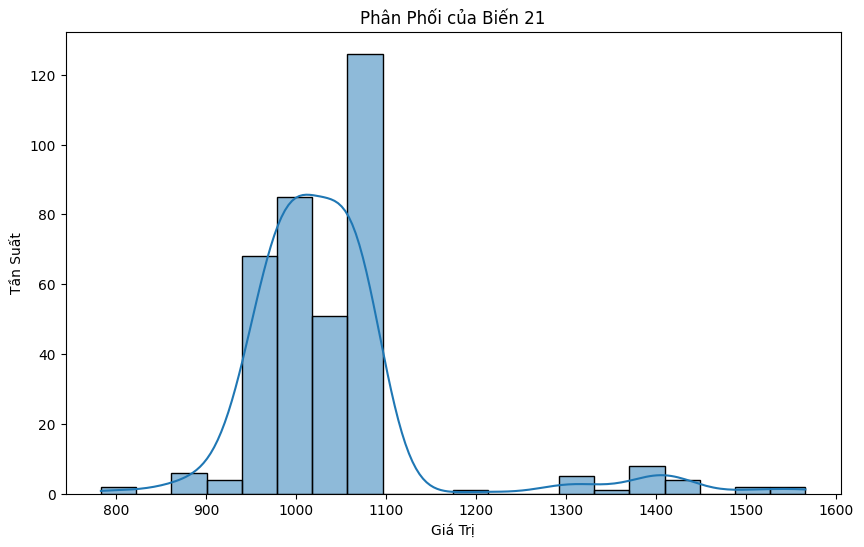

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi cột 'Ngày' sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Phân phối của biến '21'
plt.figure(figsize=(10, 6))
sns.histplot(df['21'], bins=20, kde=True)
plt.title('Phân Phối của Biến 21')
plt.xlabel('Giá Trị')
plt.ylabel('Tần Suất')
plt.show()



## Phân Tích Tương Quan

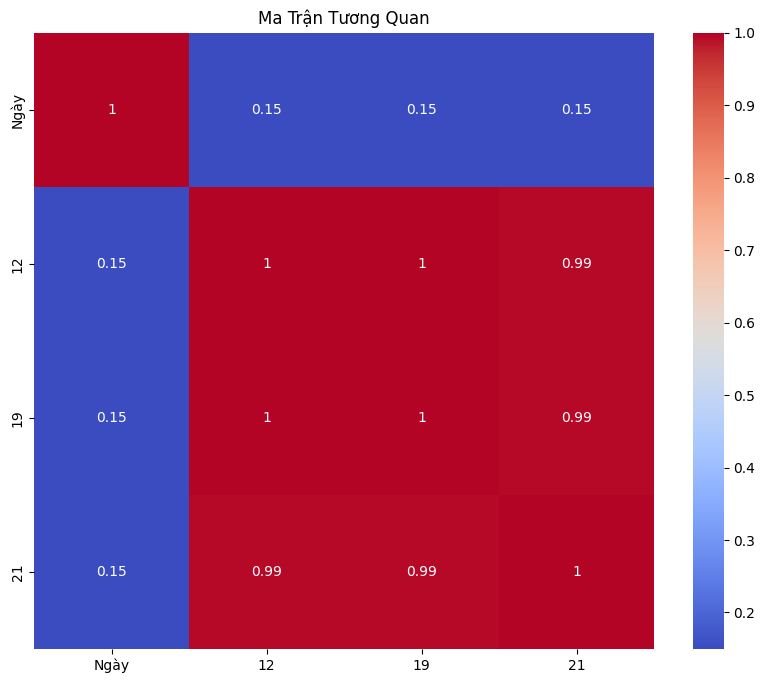

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma Trận Tương Quan')
plt.show()

## Phân Tích Đa Biến

### Biểu Đồ Phân Phối Đa Biến

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

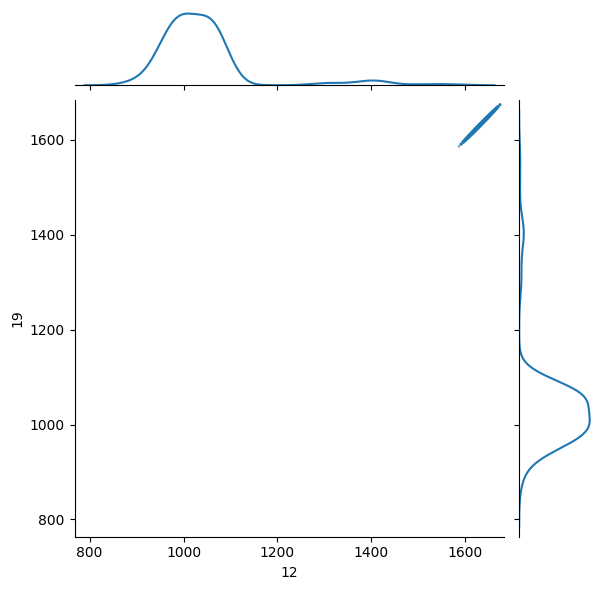

In [16]:
# Biểu đồ chung cho '12' và '19'
sns.jointplot(x='12', y='19', data=df, kind='kde')
plt.show()

### Biểu Đồ Phân Tán Ma Trận

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


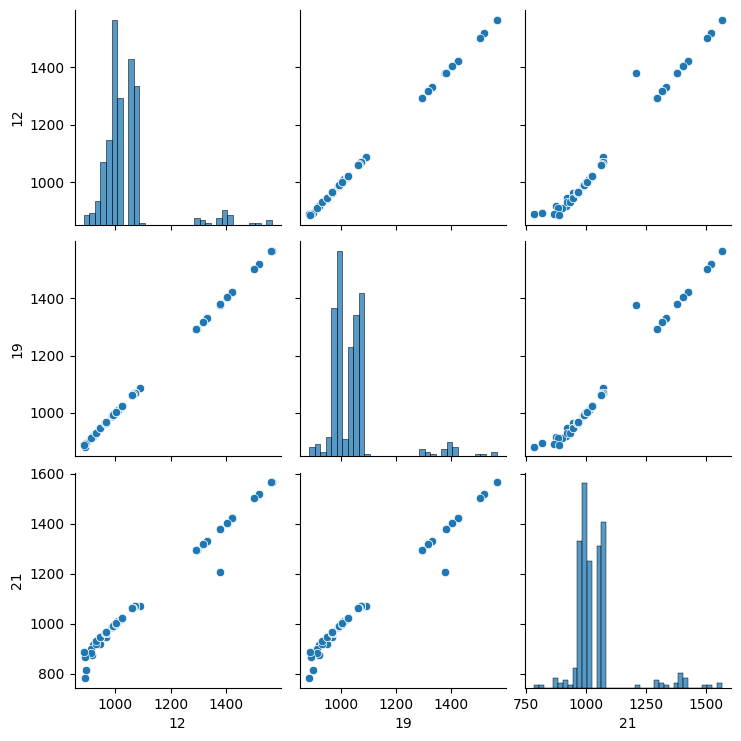

In [17]:
sns.pairplot(df)
plt.show()

### Biểu Đồ Hộp Đa Biến

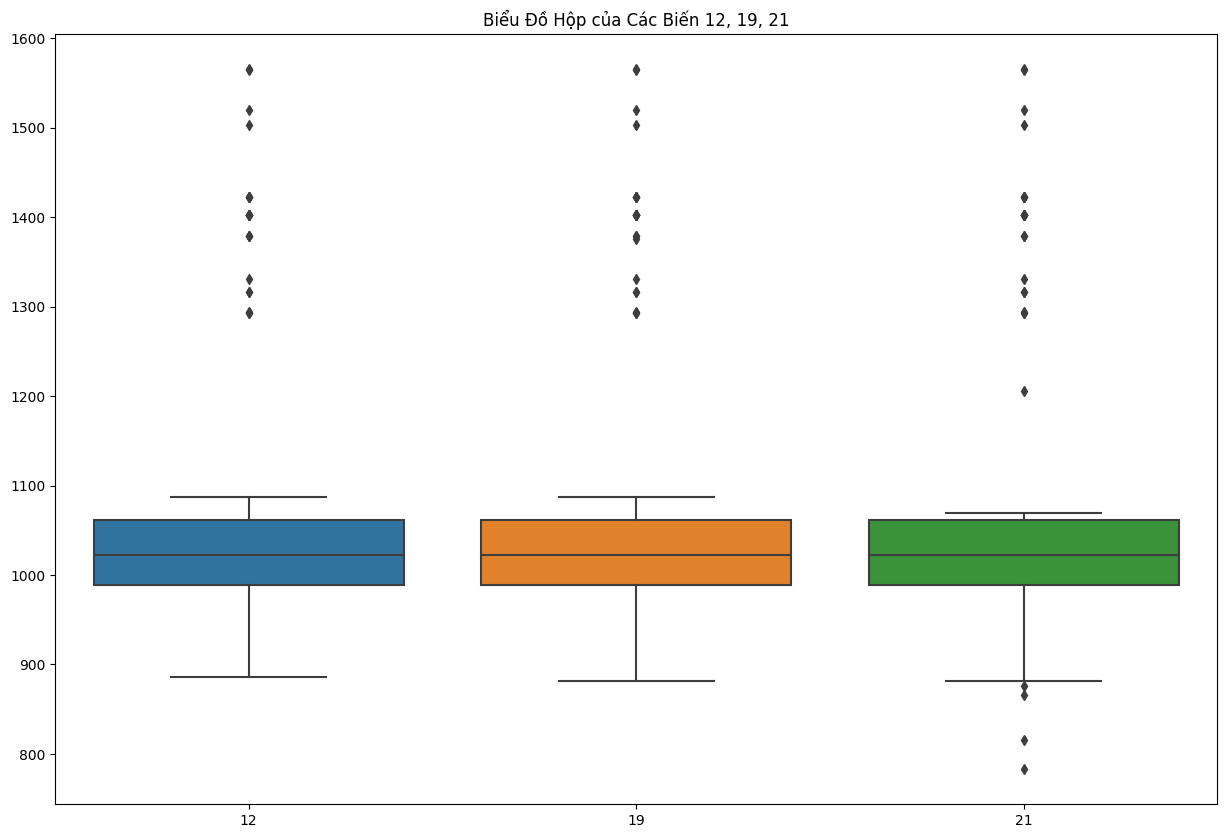

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['12', '19', '21']])
plt.title('Biểu Đồ Hộp của Các Biến 12, 19, 21')
plt.show()

# Bộ lọc Kalman

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")

# Lựa chọn các cột cần thiết
df = df[["Ngày", "12", "19", "21"]]

# Chuyển đổi cột "Ngày" sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Sắp xếp DataFrame theo ngày
df = df.sort_values('Ngày')

# Hàm áp dụng bộ lọc Kalman
def kalman_filter(data, A, H, Q, R, x0, P0):
    n = len(data)
    x_est = np.zeros(n)
    P = P0
    x = x0

    for t in range(n):
        # Prediction
        x = A * x
        P = A * P * A + Q

        # Measurement Update
        K = P * H / (H * P * H + R)
        x = x + K * (data[t] - H * x)
        P = (1 - K * H) * P

        x_est[t] = x

    return x_est

# Áp dụng bộ lọc Kalman cho từng cột
columns = ["12", "19", "21"]
for col in columns:
    data_column = df[col].values
    A = 1  # Ma trận chuyển tiếp
    H = 1  # Ma trận quan sát
    Q = 1e-5  # Hiệp phương sai chuyển tiếp
    R = 1e-1  # Hiệp phương sai quan sát
    x0 = data_column[0]  # Trạng thái ban đầu
    P0 = 1  # Hiệp phương sai trạng thái ban đầu
    
    filtered_data = kalman_filter(data_column, A, H, Q, R, x0, P0)
    df[col + "_Kalman"] = filtered_data

# Hiển thị dữ liệu sau khi áp dụng bộ lọc Kalman
df.head()


,Ngày,12,19,21,12_Kalman,19_Kalman,21_Kalman
0,2021-01-01,964.4,963.6,945.5,964.400000,963.600000,945.500000
31,2021-01-02,964.4,964.4,964.4,964.400000,963.980975,954.500523
59,2021-01-03,988.3,988.4,988.3,972.111077,971.859510,965.405560
90,2021-01-04,988.4,988.4,988.4,976.085462,975.895275,971.016044
120,2021-01-05,930.6,930.6,918.7,967.161140,967.008269,960.751551


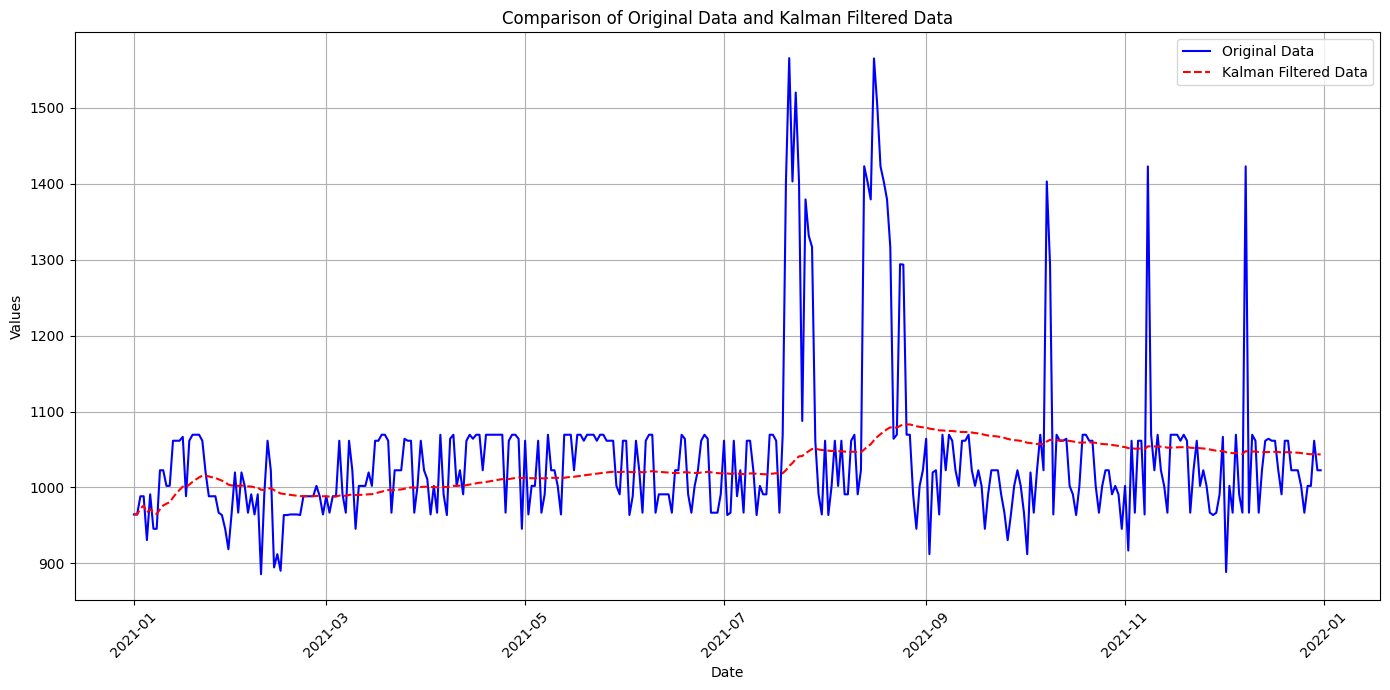

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Vẽ biểu đồ trước và sau khi áp dụng bộ lọc Kalman
plt.figure(figsize=(14, 7))
plt.plot(df['Ngày'], df['12'], label='Original Data', color='blue')
plt.plot(df['Ngày'], df['12_Kalman'], label='Kalman Filtered Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of Original Data and Kalman Filtered Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Mô hình hồi quy tuyến tính dùng cột 12 và 19 đã lọc để dự đoán cột 21 đã lọc

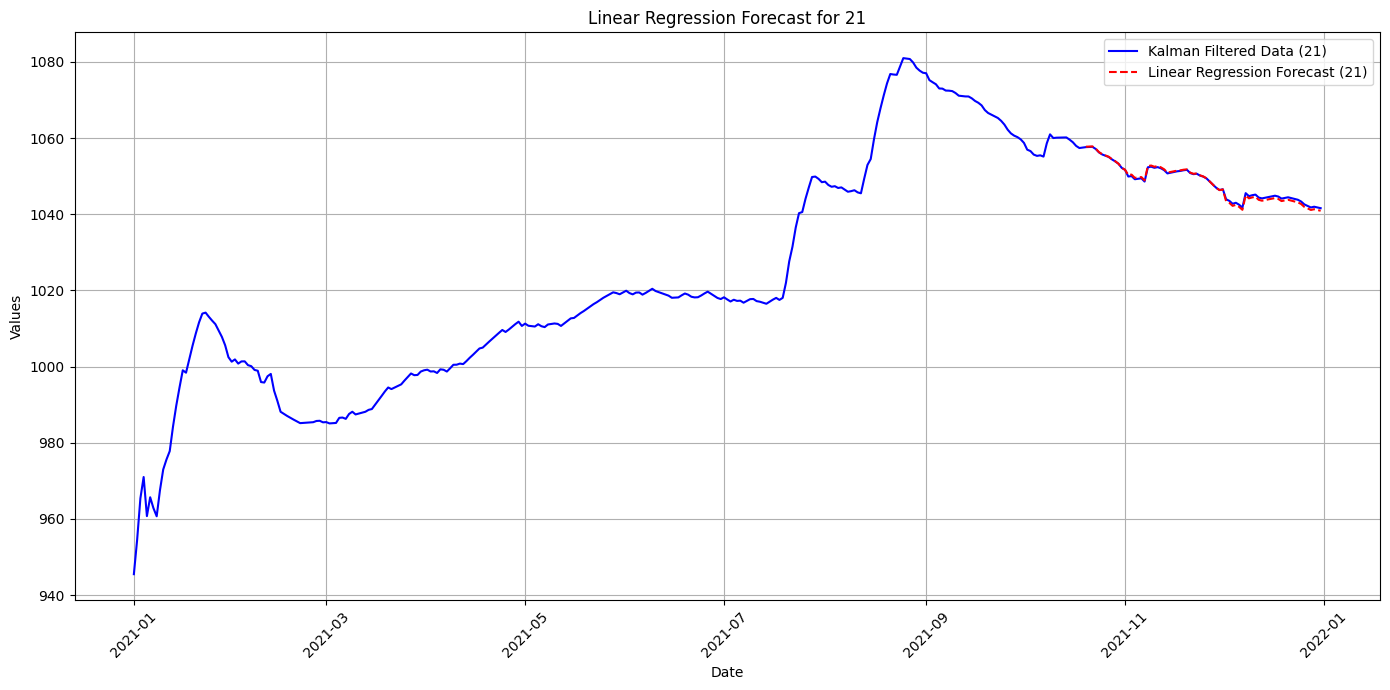

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("/kaggle/input/dataset/Gia SMP va SMPcap 2021(Gi th trng SMP).csv", sep=";", encoding="ISO-8859-1")

# Lựa chọn các cột cần thiết
df = df[["Ngày", "12", "19", "21"]]

# Chuyển đổi cột "Ngày" sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], dayfirst=True)

# Sắp xếp DataFrame theo ngày
df = df.sort_values('Ngày')

# Hàm áp dụng bộ lọc Kalman
def kalman_filter(data, A, H, Q, R, x0, P0):
    n = len(data)
    x_est = np.zeros(n)
    P = P0
    x = x0

    for t in range(n):
        # Prediction
        x = A * x
        P = A * P * A + Q

        # Measurement Update
        K = P * H / (H * P * H + R)
        x = x + K * (data[t] - H * x)
        P = (1 - K * H) * P

        x_est[t] = x

    return x_est

# Áp dụng bộ lọc Kalman cho từng cột
columns = ["12", "19", "21"]
for col in columns:
    data_column = df[col].values
    A = 1  # Ma trận chuyển tiếp
    H = 1  # Ma trận quan sát
    Q = 1e-5  # Hiệp phương sai chuyển tiếp
    R = 1e-1  # Hiệp phương sai quan sát
    x0 = data_column[0]  # Trạng thái ban đầu
    P0 = 1  # Hiệp phương sai trạng thái ban đầu
    
    filtered_data = kalman_filter(data_column, A, H, Q, R, x0, P0)
    df[col + "_Kalman"] = filtered_data

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Mô hình hồi quy tuyến tính
linear_model = LinearRegression()

# Dự báo cho cột "21_Kalman" sử dụng "12_Kalman" và "19_Kalman"
X_train = train[["12_Kalman", "19_Kalman"]]
y_train = train["21_Kalman"]
X_test = test[["12_Kalman", "19_Kalman"]]

linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Vẽ biểu đồ kết quả dự báo hồi quy tuyến tính
plt.figure(figsize=(14, 7))
plt.plot(df['Ngày'], df['21_Kalman'], label='Kalman Filtered Data (21)', color='blue')
plt.plot(df['Ngày'][train_size:], linear_predictions, label='Linear Regression Forecast (21)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Linear Regression Forecast for 21')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 

# Mô hình LSTM

In [48]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Ngày', inplace=True)
df

,12,19,21,12_Kalman,19_Kalman,21_Kalman
Ngày,,,,,,
2021-01-01,964.4,963.6,945.5,964.400000,963.600000,945.500000
2021-01-02,964.4,964.4,964.4,964.400000,963.980975,954.500523
2021-01-03,988.3,988.4,988.3,972.111077,971.859510,965.405560
2021-01-04,988.4,988.4,988.4,976.085462,975.895275,971.016044
2021-01-05,930.6,930.6,918.7,967.161140,967.008269,960.751551
...,...,...,...,...,...,...
2021-12-27,1002.0,1002.1,1002.0,1044.099777,1044.043029,1042.197921
2021-12-28,1002.0,1002.0,1002.0,1043.680276,1043.624093,1041.797371
2021-12-29,1061.5,1061.5,1061.5,1043.857835,1043.802211,1041.993691


In [50]:
data = df.filter(['12'])
dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

329

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [52]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.11576934, 0.11576934, 0.15092674, 0.15107385, 0.06604884,
       0.1547514 , 0.08796705, 0.08796705, 0.20138276, 0.20138276,
       0.17107973, 0.17122683, 0.25860547, 0.25860547, 0.25860547,
       0.26610768, 0.15107385, 0.25860547, 0.27022654, 0.27022654,
       0.27022654, 0.25860547, 0.1971168 , 0.15092674, 0.15107385,
       0.15107385, 0.11915269, 0.11459253, 0.08796705, 0.04839659])]
[0.11915269196822598]

[array([0.11576934, 0.11576934, 0.15092674, 0.15107385, 0.06604884,
       0.1547514 , 0.08796705, 0.08796705, 0.20138276, 0.20138276,
       0.17107973, 0.17122683, 0.25860547, 0.25860547, 0.25860547,
       0.26610768, 0.15107385, 0.25860547, 0.27022654, 0.27022654,
       0.27022654, 0.25860547, 0.1971168 , 0.15092674, 0.15107385,
       0.15107385, 0.11915269, 0.11459253, 0.08796705, 0.04839659]), array([0.11576934, 0.15092674, 0.15107385, 0.06604884, 0.1547514 ,
       0.08796705, 0.08796705, 0.20138276, 0.20138276, 0.17107973,
       0.17122683, 0.25860547, 0.

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-05-21 04:09:25.850312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 04:09:25.850438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 04:09:25.996232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


299/299 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0404


In [55]:

#training_data_len = 1860, co tat ca 2300 diem du lieu
# test data lay tu 1800 den 2299
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
# lay ket qua da du doan
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models =
# danh gia mo hinh
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE:  81.04072058549406


/tmp/ipykernel_33/1416944420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


KeyError: '8'

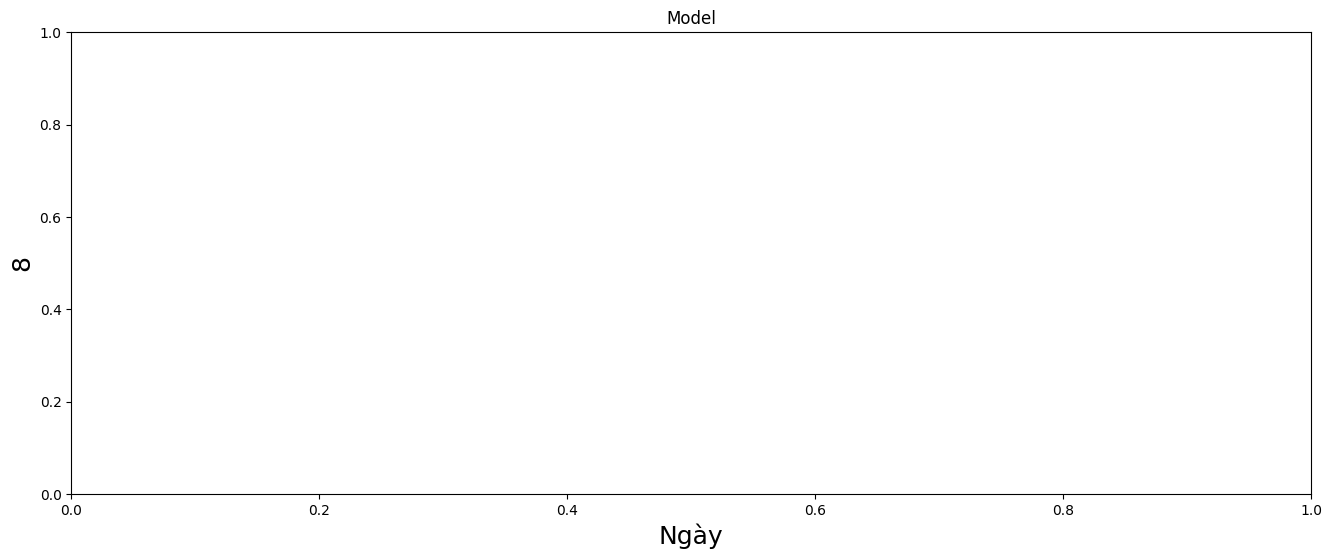

In [56]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('8', fontsize=18)
plt.plot(train['8'])
plt.plot(valid[['8', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# MÔ hình Gausian

In [30]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [28]:
feats= ['11']

In [31]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X=transformer.fit_transform(np.array(df[['8']]).reshape(-1,1))

In [32]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [33]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=['8'])
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [39]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.000151726
[400]	valid_0's multi_logloss: 0.000151726
[200]	valid_0's multi_logloss: 0.000153686
[400]	valid_0's multi_logloss: 0.000153686
[200]	valid_0's multi_logloss: 0.000154034
[400]	valid_0's multi_logloss: 0.000154034
[200]	valid_0's multi_logloss: 0.000156754
[400]	valid_0's multi_logloss: 0.000156754
[200]	valid_0's multi_logloss: 0.000153261
[400]	valid_0's multi_logloss: 0.000153261
[200]	valid_0's multi_logloss: 0.00015524
[400]	valid_0's multi_logloss: 0.00015524
[200]	valid_0's multi_logloss: 0.000155472
[400]	valid_0's multi_logloss: 0.000155472
[200]	valid_0's multi_logloss: 9.92419e-06
[400]	valid_0's multi_logloss: 9.8222e-06
[600]	valid_0's multi_logloss: 9.75475e-06
[800]	valid_0's multi_logloss: 9.70667e-06
[1000]	valid_0's multi_logloss: 9.67072e-06
[1200]	valid_0's multi_logloss: 9.64285e-06
[1400]	valid_0's multi_logloss: 9.62062e-06
[1600]	valid_0's multi_logloss: 9.60248e-06
[1800]	valid_0's multi_logloss: 9.5874e-06
[2000]	val

In [40]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [41]:
labels=np.argmax(lgb_preds,axis=1)

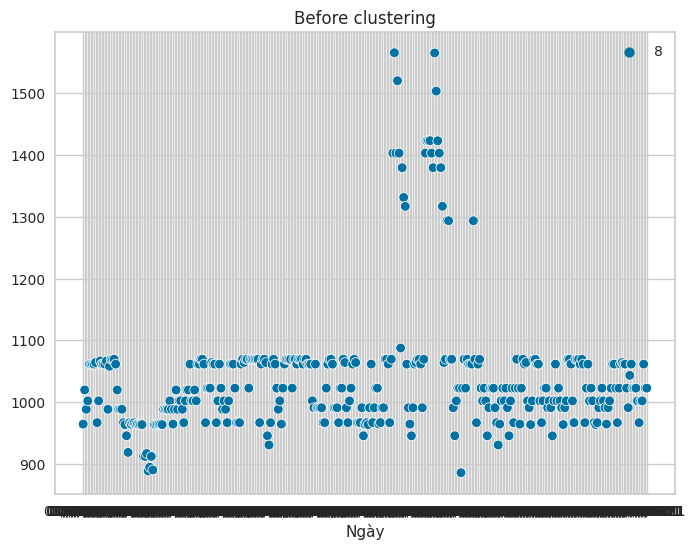

In [42]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df[feats], marker='o');
ax.set_title("Before clustering");

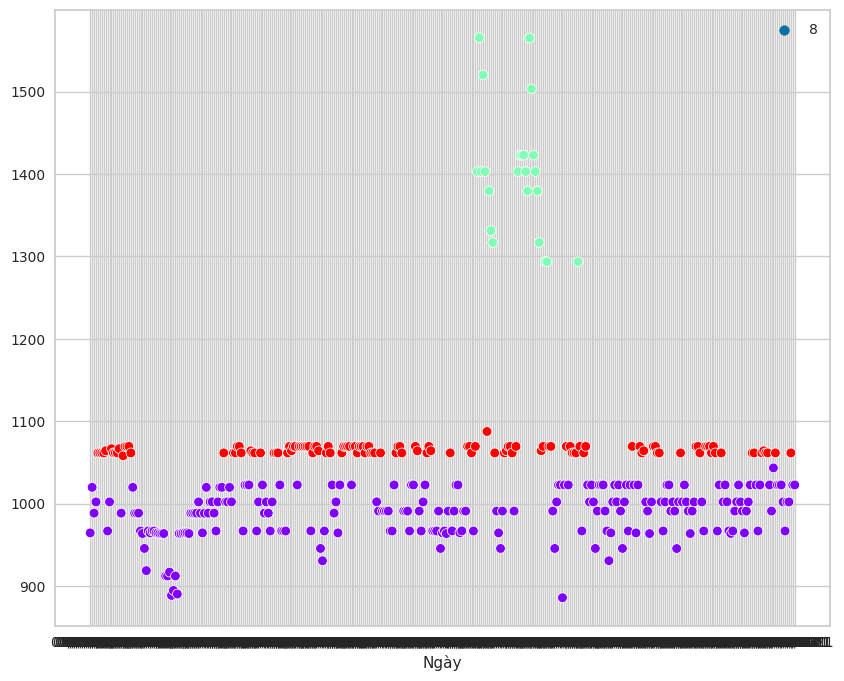

In [43]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(df[feats], c=df["Clusters"], marker='o',cmap="rainbow");
ax.set_title("After Clustering");

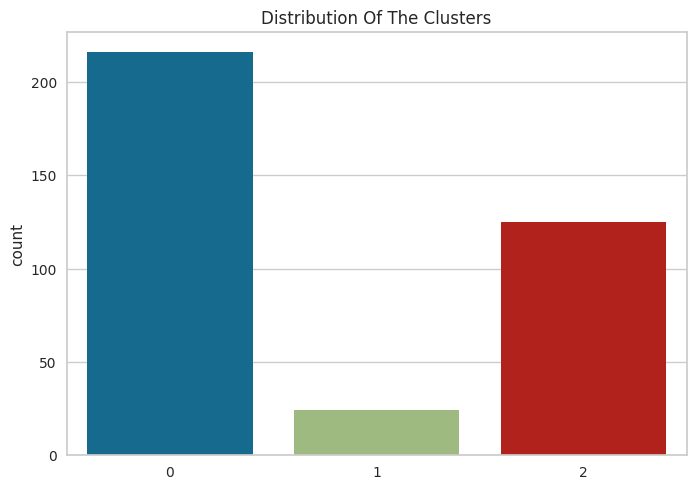

In [44]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

# Mô hình SVM

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [30]:
forecast_days = 15
df = df[feats]
df['Prediction'] = df[feats].shift(-forecast_days)

KeyError: "None of [Index(['11'], dtype='object')] are in the [columns]"

In [101]:
X = np.array(df.drop(['Prediction'], axis=1))
X = X[:-forecast_days]
y = np.array(df['Prediction'])
y = y[:-forecast_days]

In [102]:
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [103]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

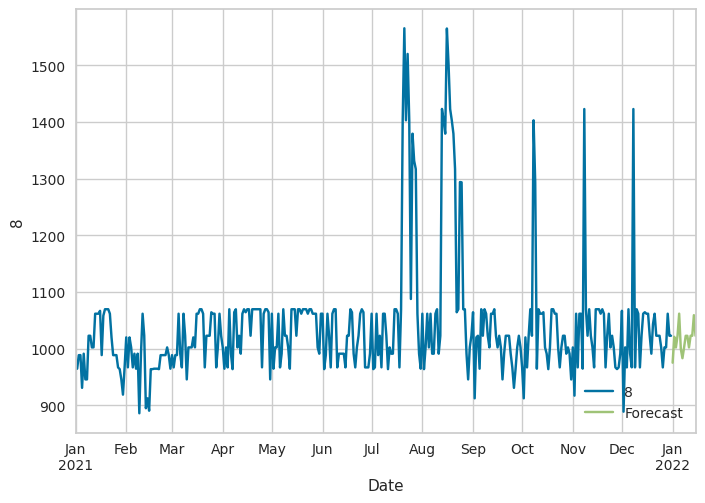

In [104]:
forecast_set = model.predict(X[-forecast_days:])
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = pd.Timestamp(next_unix, unit='s')
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
df[feats].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('8')
plt.show()